In [162]:
%pip install -r requirements.txt --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN


In [3]:
data_file= pd.read_csv('imports.csv')
data_file.head()

,id,os,cv2,time,argparse,multiprocessing,numpy,tensorflow,matplotlib,pyplot,...,arcgis.gis,GIS,arcgis.features,GeoAccessor,GeoSeriesAccessor,datetimetimedelta,dashboard,widgets,zlib,calendar
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=data_file.values[:,1:]
Clus_dataSet=StandardScaler().fit_transform(X)

In [287]:
dbscan = DBSCAN(
    eps=1,
    min_samples=10,
)

In [293]:
dbscan = dbscan.fit(Clus_dataSet)
labels = dbscan.labels_
print(labels)

[-1 -1 -1 -1 -1  0 -1  0  0  0  0  0  0 -1 -1  0  0  0  0 -1 -1  0  0 -1
 -1  0  0 -1 -1  0 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [5]:
clasterNum=10
k_maens = KMeans(init="k-means++",n_clusters=clasterNum,n_init=12, random_state=123)
k_maens.fit(Clus_dataSet)
labels=k_maens.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [6]:
data_file.insert(0,'labels', labels)

labels
0    811
1      1
2      1
3      1
4      1
5      1
6      5
7      2
8      2
9      3
Name: id, dtype: int64


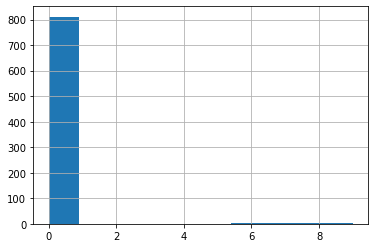

In [7]:
from matplotlib import pyplot as plt
h = data_file['labels'].hist()
fig = h.get_figure()
print(data_file.groupby(['labels'])['id'].count())

In [8]:
df = data_file[data_file.labels ==9]
df.loc[:, (df != 0).any(axis=0)]

,labels,id,os,time,numpy,tensorflow,matplotlib,urllib.request,datasets,matplotlib.pyplot,...,slim,flowers,preprocessing,inception_preprocessing,urllib2,imagenet,nets,inception,vgg,vgg_preprocessing
10,9,10,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
47,9,47,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
69,9,69,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
